Matplotlib is building the font cache; this may take a moment.
C:\Users\SUCHETA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SUCHETA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SUCHETA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SUCHETA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  

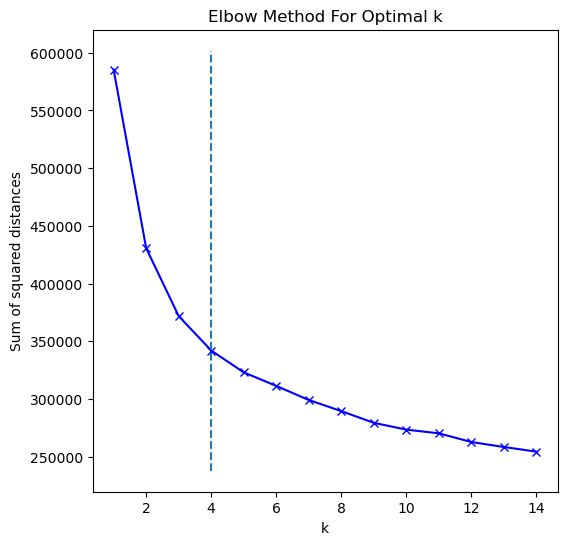

The optimal number of clusters is 4


In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
!pip install kneed
from kneed import KneeLocator
import matplotlib.pyplot as plt


def optimal_k(csv_file):
    # Load data
    df = pd.read_csv(csv_file)

    # Preprocess data: The features should be numeric and scaled
    # Select columns 3 to 282 for clustering
    data = df.iloc[:, 2:282]  # Python uses 0-indexing

    # Instantiate the scaler
    scaler = StandardScaler()
    # Fit and transform the scaler on the data
    scaled_features = scaler.fit_transform(data)

    # Perform kmeans and calculate SSE for each k
    sse = []
    K = range(1, 15)  # change range accordingly

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_features)
        sse.append(kmeans.inertia_)

    # Find the elbow point to determine the optimal k
    kl = KneeLocator(K, sse, curve="convex", direction="decreasing")

    # Plot sse against k
    plt.figure(figsize=(6, 6))
    plt.plot(K, sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method For Optimal k')
    plt.vlines(kl.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
    plt.show()

    print('The optimal number of clusters is %d' % kl.elbow)

# Call the function with your csv file
optimal_k('C:\\Users\\SUCHETA\\Documents\\GitHub\\college-compass-backend\\static\\complete_dataset_final.csv')

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

def assign_clusters(csv_file):
    # Load data
    df = pd.read_csv(csv_file)

    # Preprocess data: The features should be numeric and scaled
    # Select columns 3 to 282 for clustering
    data = df.iloc[:, 2:282]  # Python uses 0-indexing

    # Instantiate the scaler
    scaler = StandardScaler()
    # Fit and transform the scaler on the data
    scaled_features = scaler.fit_transform(data)

    # Fit kmeans with optimal number of clusters
    kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
    kmeans.fit(scaled_features)

    # Predict the clusters for each data point
    clusters = kmeans.predict(scaled_features)

    # Add the cluster assignments to the original DataFrame
    df['cluster_number'] = clusters

    # Save the DataFrame with cluster assignments back to a CSV file
    df.to_csv(r'C:\Users\SUCHETA\Documents\GitHub\college-compass-backend\static\complete_dataset_final_1.csv', index=False)

# Call the function with your csv file
assign_clusters(r'C:\Users\SUCHETA\Documents\GitHub\college-compass-backend\static\complete_dataset_final.csv')
